### Answer 1

In [2]:
import pandas as pd
import numpy as np

In [3]:
# read the data in the data frame
df = pd.read_csv('airBoxData.csv')
df.head()

,siteID,year,month,day,hour,weekday,gps_lat,gps_lon,PM10,Tmp,PM2.5,PM1.0,RH,area
0,08BEAC0286D2,2020,7,18,1,6,23.876,120.529,4.8,30.544,4.4,3.2,77.0,changhua
1,08BEAC0286D2,2020,7,18,2,6,23.876,120.529,5.5,30.638,5.3,4.1,76.3,changhua
2,08BEAC0286D2,2020,7,18,3,6,23.876,120.529,5.7,30.563,5.3,4.0,75.2,changhua
3,08BEAC0286D2,2020,7,18,4,6,23.876,120.529,5.6,30.241,5.4,4.2,75.2,changhua
4,08BEAC0286D2,2020,7,18,5,6,23.876,120.529,6.3,30.166,5.8,4.6,74.8,changhua


In [4]:
# Display all records sorted by the PM2.5 values
df.sort_values(by=['PM2.5'], inplace=True)
df

,siteID,year,month,day,hour,weekday,gps_lat,gps_lon,PM10,Tmp,PM2.5,PM1.0,RH,area
23470,74DA38AF490C,2020,7,19,13,7,22.654000,120.285000,0.000000,29.655000,0.000000,0.000000,56.000000,kaohsiung
127455,74DA38EBF5FC,2020,7,23,23,4,22.335000,120.367000,0.100000,30.708000,0.000000,0.000000,84.400000,taipei
127456,74DA38EBF5FC,2020,7,24,0,5,22.335000,120.367000,0.000000,30.736000,0.000000,0.000000,83.200000,taipei
99884,74DA38EBF5E6,2020,7,18,23,6,24.118000,120.652000,0.000000,30.068750,0.000000,0.000000,46.250000,taichuang
99885,74DA38EBF5E6,2020,7,19,0,7,24.118000,120.652000,0.000000,30.138000,0.000000,0.000000,51.700000,taichuang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64829,74DA38F7C26E,2020,7,23,10,4,24.997000,121.313000,99.555556,32.823333,93.555556,62.888889,67.888889,new_taipei
59673,74DA38EBF6AE,2020,7,23,4,4,23.716000,120.252000,96.333333,30.548889,93.555556,69.000000,64.333333,new_taipei
48667,08BEAC0288D6,2020,7,21,2,2,24.983695,121.250315,95.888889,31.750000,93.555556,83.666667,59.000000,new_taipei
48694,08BEAC0288D6,2020,7,24,1,5,24.983695,121.250315,98.700000,32.402000,95.000000,85.100000,56.000000,new_taipei


In [5]:
# Calculate and show how many devices in each city
df.groupby('area').count()['siteID']

area
None               1802
changhua           8556
chiayi_city        2190
chiayi_county      2975
hsinchu_city       2995
hsinchu_county     3566
kaohsiung         13048
keelung             721
miaoli             6274
nantou             3860
new_taipei        20847
pingtung           3344
taichuang         36755
tainan             8303
taipei            20621
taitung             338
taoyuan            5055
yilan              2672
yunlin             2116
Name: siteID, dtype: int64

In [6]:
# Display the average PM2.5 values(over the whole time span) of each device and sort them by
# the PM2.5 values. You can identify which device location with the best/worst PM2.5 quality
# and observe some unreasonable measurements
df["PM2.5"].mean() # the average PM2.5 values

9.412059189977079

In [7]:
df.sort_values(by=['PM2.5'], ascending=False)['siteID'].iloc[0]  # worst PM2.5 quality

'08BEAC0AB772'

In [8]:
df.sort_values(by=['PM2.5'], ascending=False)['siteID'].iloc[-1] # best PM2.5 quality

'74DA38AF490C'

In [9]:
# Display the average PM2.5 values(over the whole time span) of each city and sort them by
# the PM2.5 values. You can identify which city has best/worst air quality
df_city_pm25 = df[['PM2.5', 'area']]
df_city_pm25.groupby('area').agg({'PM2.5':sum}).sort_values(by='PM2.5', ascending=False)

,PM2.5
area,
taichuang,312959.858333
new_taipei,283340.973557
taipei,207267.270743
kaohsiung,92412.913203
miaoli,75789.629365
changhua,69820.691017
tainan,61048.354942
taoyuan,48043.605520
pingtung,34792.841991


In [10]:
# Calculate the average PM2.5 of each day within each city.
# List the results by sorting average PM2.5 values in ascending order within each city,
# i.e. you should put average PM2.5 values of the same city together.
# (We do not mind the order among cities).
# You can identity which day has the best/worst air quality in each city
df_city_pm25 = df[['PM2.5', 'area']]
df_city_pm25.groupby('area').agg({'PM2.5': np.average}).sort_values(by='PM2.5', ascending=False)


,PM2.5
area,
new_taipei,13.591451
keelung,12.633222
miaoli,12.079954
None,10.510882
pingtung,10.404558
taipei,10.051272
taoyuan,9.504175
hsinchu_county,9.111924
taichuang,8.514756


In [11]:
# Calculate average PM 2.5 values (all devices in Taiwan) of each hour on Friday and
# do the same thing for Saturday. List the results by a table.
# The table has three columns whose names should be “hour”, “Friday_PM2.5” and “Saturday_PM2.5
# The result should be sorted by “hour” in ascending order You can observe the
# difference of air quality change over time between Friday and Saturday.


In [12]:
df['Friday_PM2.5'] = df[df.weekday == 5].hour
df['Saturday_PM2.5'] = df[df.weekday == 6].hour
df[['Friday_PM2.5', "Saturday_PM2.5", "PM2.5", "hour"]].sort_values(by='hour', ascending=True)

,Friday_PM2.5,Saturday_PM2.5,PM2.5,hour
103779,0.0,NaN,4.111111,0
52935,0.0,NaN,16.800000,0
132621,NaN,0.0,10.000000,0
75910,NaN,NaN,10.000000,0
38050,NaN,NaN,16.800000,0
...,...,...,...,...
140740,23.0,NaN,15.800000,23
19800,NaN,23.0,15.800000,23
26751,NaN,NaN,15.800000,23
81439,NaN,NaN,3.200000,23


### Answer 2

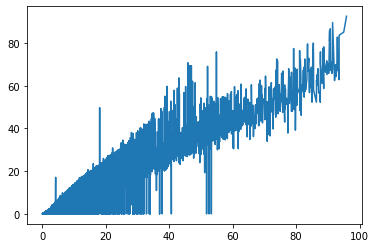

In [13]:
# Is the PM2.5 related to PM1.0? You should choose and create a visualization to support
# your answer
import matplotlib.pyplot as plt

plt.plot(df['PM2.5'], df['PM1.0'])

In [57]:
#Among Taipei, Pingtung, Nantou and Taichuang, which city has the most significant
# difference PM2.5 change pattern over the whole day on July 24 from the other three cities?
# You should choose and create a visualization to support your answer.
df_city = df.loc[(df.month == 7) & (df.day == 24) & (df.area.isin(['taipei', 'pingtung', 'nantou', 'taichuang']))][['month', 'day', 'PM2.5', 'area']]

df_city


,month,day,PM2.5,area
127456,7,24,0.000000,taipei
127457,7,24,0.000000,taipei
103444,7,24,0.000000,taichuang
127458,7,24,0.000000,taipei
127459,7,24,0.000000,taipei
...,...,...,...,...
80157,7,24,76.400000,taichuang
83638,7,24,79.222222,taichuang
115383,7,24,83.600000,taipei
83518,7,24,86.400000,taichuang


In [65]:
df_city_pm25 = df_city.groupby('area')[['area', 'PM2.5']].sum().reset_index()
df_city_pm25

,area,PM2.5
0,nantou,4583.611364
1,pingtung,4970.760498
2,taichuang,47963.389033
3,taipei,28359.218182


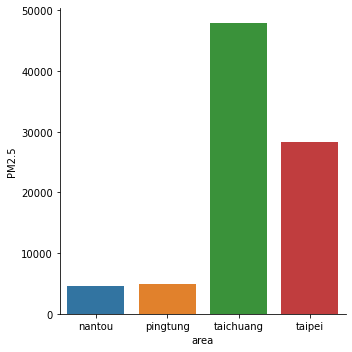

In [71]:
import seaborn as sns
sns.catplot(x='area', y='PM2.5',kind='bar', data=df_city_pm25)

In [ ]:
#Assume we only consider PM2.5 to evaluate the air quality) Please implement the following steps to answer which city (Taipei or Tainan) has a better air quality.

In [72]:
#Remove all records whose PM2.5 is 0 (simple data cleaning process to remove impossible data values)
df_PM25gt_0 = df.loc[df['PM2.5'] > 0]
df_PM25gt_0

,siteID,year,month,day,hour,weekday,gps_lat,gps_lon,PM10,Tmp,PM2.5,PM1.0,RH,area,Friday_PM2.5,Saturday_PM2.5
3487,74DA38AF47B4,2020,7,21,7,2,24.086000,120.538000,0.090909,31.173636,0.090909,0.000000,64.000000,changhua,NaN,NaN
89429,74DA38AF481E,2020,7,22,0,3,24.161000,120.668000,0.909091,30.810000,0.090909,0.000000,100.000000,taichuang,NaN,NaN
5062,74DA38B05366,2020,7,24,0,5,23.994000,120.564000,0.909091,29.348182,0.090909,0.000000,57.181818,changhua,0.0,NaN
118729,74DA38AF47A2,2020,7,24,15,5,25.057000,121.517000,0.181818,30.552727,0.090909,0.000000,75.272727,taipei,15.0,NaN
138032,74DA38B0514E,2020,7,24,4,5,25.018000,121.304000,0.272727,26.929091,0.090909,0.000000,55.454545,taoyuan,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64829,74DA38F7C26E,2020,7,23,10,4,24.997000,121.313000,99.555556,32.823333,93.555556,62.888889,67.888889,new_taipei,NaN,NaN
59673,74DA38EBF6AE,2020,7,23,4,4,23.716000,120.252000,96.333333,30.548889,93.555556,69.000000,64.333333,new_taipei,NaN,NaN
48667,08BEAC0288D6,2020,7,21,2,2,24.983695,121.250315,95.888889,31.750000,93.555556,83.666667,59.000000,new_taipei,NaN,NaN
48694,08BEAC0288D6,2020,7,24,1,5,24.983695,121.250315,98.700000,32.402000,95.000000,85.100000,56.000000,new_taipei,1.0,NaN


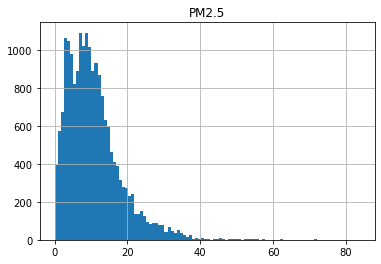

In [78]:
# Collect all records from Taipei and draw a histogram to shows how many hour PM2.5 records in each histogram bin interval. Set the histogram bin count to 100, the min value to 0 and max value to 100 to create the histogram.
df_PM25gt_0_taipei = df_PM25gt_0[df_PM25gt_0['area'] == 'taipei'][['area', 'PM2.5']]
df_PM25gt_0_taipei.hist(bins=100);

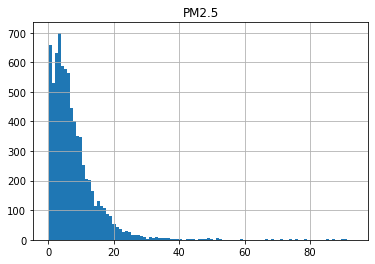

In [79]:
# Repeat the above step to draw a histogram for Tainan
df_PM25gt_0_taipei = df_PM25gt_0[df_PM25gt_0['area'] == 'tainan'][['area', 'PM2.5']]
df_PM25gt_0_taipei.hist(bins=100);

In [89]:
# Observe these two histograms to answer which city has a better air quality in the time span of the dataset and explain your answer.
df_PM25gt_0_taipei_and_tainan = df_PM25gt_0[df_PM25gt_0['area'].isin(['taipei', 'tainan'])]


df_PM25gt_0_taipei_and_tainan

,siteID,year,month,day,hour,weekday,gps_lat,gps_lon,PM10,Tmp,PM2.5,PM1.0,RH,area,Friday_PM2.5,Saturday_PM2.5
118729,74DA38AF47A2,2020,7,24,15,5,25.057,121.517,0.181818,30.552727,0.090909,0.000000,75.272727,taipei,15.0,NaN
108778,74DA38B050BA,2020,7,24,16,5,22.991,120.223,0.090909,34.754545,0.090909,0.000000,100.000000,tainan,16.0,NaN
108611,74DA38B050B6,2020,7,24,18,5,22.995,120.163,0.090909,35.070000,0.090909,0.090909,100.000000,tainan,18.0,NaN
108252,74DA38AF48DC,2020,7,23,21,4,23.012,120.187,0.090909,28.573636,0.090909,0.000000,68.272727,tainan,NaN,NaN
120944,74DA38B051F4,2020,7,22,22,3,25.034,121.525,0.090909,29.855455,0.090909,0.000000,63.090909,taipei,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113633,74DA38EBF8AC,2020,7,24,11,5,23.233,120.180,94.777778,32.620000,89.666667,71.666667,72.555556,tainan,11.0,NaN
113545,74DA38EBF8AC,2020,7,18,14,6,23.233,120.180,94.600000,32.919000,90.200000,70.300000,71.800000,tainan,NaN,14.0
113600,74DA38EBF8AC,2020,7,22,11,3,23.233,120.180,94.900000,33.094000,91.000000,71.100000,71.200000,tainan,NaN,NaN
113570,74DA38EBF8AC,2020,7,20,9,1,23.233,120.180,95.900000,32.041000,91.200000,70.700000,69.600000,tainan,NaN,NaN


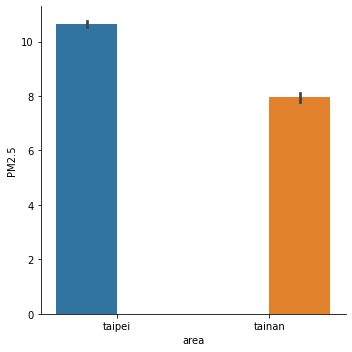

In [90]:
sns.catplot(x='area', y='PM2.5',kind='bar',hue='area', data=df_PM25gt_0_taipei_and_tainan)